<a href="https://colab.research.google.com/github/MelikaKalbasi/knowledge-discovery/blob/main/HW2MelikaK_AmirR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/medico.zip -d Medico

Streaming output truncated to the last 5000 lines.
  inflating: Medico/HeadCT/005000.jpeg  
  inflating: Medico/HeadCT/005001.jpeg  
  inflating: Medico/HeadCT/005002.jpeg  
  inflating: Medico/HeadCT/005003.jpeg  
  inflating: Medico/HeadCT/005004.jpeg  
  inflating: Medico/HeadCT/005005.jpeg  
  inflating: Medico/HeadCT/005006.jpeg  
  inflating: Medico/HeadCT/005007.jpeg  
  inflating: Medico/HeadCT/005008.jpeg  
  inflating: Medico/HeadCT/005009.jpeg  
  inflating: Medico/HeadCT/005010.jpeg  
  inflating: Medico/HeadCT/005011.jpeg  
  inflating: Medico/HeadCT/005012.jpeg  
  inflating: Medico/HeadCT/005013.jpeg  
  inflating: Medico/HeadCT/005014.jpeg  
  inflating: Medico/HeadCT/005015.jpeg  
  inflating: Medico/HeadCT/005016.jpeg  
  inflating: Medico/HeadCT/005017.jpeg  
  inflating: Medico/HeadCT/005018.jpeg  
  inflating: Medico/HeadCT/005019.jpeg  
  inflating: Medico/HeadCT/005020.jpeg  
  inflating: Medico/HeadCT/005021.jpeg  
  inflating: Medico/HeadCT/005022.jpeg  
  infl

In [ ]:
!pip install pytorch-fid
!pip install torchmetrics
!pip install torch-fidelity
!pip install torchinfo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 37.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from google.colab import drive
import numpy as np
import random
from torchvision.transforms.transforms import Normalize
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader

In [ ]:
from matplotlib import cm
from matplotlib import patches
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np 
import pandas as pd 
import os
import torch
import torch.nn as nn
import random
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split 
from torch.utils.data import Subset
from PIL import Image
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import cv2
import torchvision.transforms as T
import torchvision.transforms.functional as F
import time
from torch.utils.data import random_split
from collections import Counter
import datetime
from torchvision.utils import make_grid
import torch.optim as optim
from matplotlib import gridspec
from numpy import linspace
from numpy.random import randn
from numpy import asarray
from torch.nn import functional as F
from tqdm import tqdm
import IPython.display
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils
import PIL.Image
import io
import shutil
from IPython.display import HTML
from pytorch_fid.fid_score import calculate_fid_given_paths
import uuid
import shutil
import torch_fidelity
from torchmetrics.image.inception import InceptionScore
from torchvision.utils import save_image
from torch.utils.data import ConcatDataset, DataLoader
from torchinfo import summary
from torchvision import datasets, models, transforms

#We can use our GPU if it's available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
dataset = torchvision.datasets.ImageFolder('Medico/')
num_train = len(dataset)
train_idx = list(range(num_train))

random.seed(1)
random.shuffle(train_idx)

test_frac =0.1

num_test = int(num_train * test_frac) 
num_train = num_train - num_test

test_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_test}  samples used as test set")

53059 samples used as train set
5895  samples used as test set


In [ ]:
random.seed(1)
random.shuffle(train_idx)

val_frac =0.1

num_val = int(num_train * val_frac) 
num_train = num_train - num_val

val_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_val}  samples used as val set")

47754 samples used as train set
5305  samples used as val set


In [ ]:
image_size = 64
transform = T.Compose([
    T.Resize((image_size,image_size)),
    T.RandomHorizontalFlip(0.5),
    T.RandomVerticalFlip(0.5),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
dataset = torchvision.datasets.ImageFolder('Medico/', transform=transform)

test_set = Subset(dataset, test_idx)
val_set = Subset(dataset, val_idx)
train_set = Subset(dataset, train_idx)

# Dataloader for train val and test
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, drop_last = True, num_workers = 2) 
val_loader = DataLoader(val_set, batch_size=64, shuffle=False,  drop_last = False, num_workers = 2) 
test_loader = DataLoader(test_set, batch_size=64, shuffle=False,  drop_last = False, num_workers = 2)

class_names = ('AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT','Hand', 'HeadCT')

In [ ]:
from collections import Counter

train_classes = [label for _, label in train_set]
Counter(train_classes)

Counter({1: 7281, 5: 8136, 3: 8018, 2: 8109, 0: 8133, 4: 8077})

In [ ]:
test_classes = [label for _, label in test_set]
Counter(test_classes)

Counter({5: 1001, 3: 1012, 1: 910, 2: 1016, 4: 978, 0: 978})

In [ ]:
val_classes = [label for _, label in val_set]
Counter(val_classes)

Counter({3: 970, 4: 945, 5: 863, 0: 889, 2: 875, 1: 763})

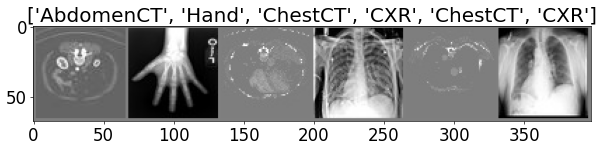

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.5,0.5,0.5])
    std = np.array([0.5,0.5,0.5])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()
# load a batch of train image
iterator = iter(train_loader)
# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:6])
imshow(out, title=[class_names[x] for x in classes[:6]])

In [ ]:
model_resnet18 = models.resnet18(weights=None)   #load resnet18 model
num_features = model_resnet18.fc.in_features     #extract fc layers features
model_resnet18.fc = nn.Linear(num_features, 6) #(num_of_class == 6)
model_resnet18 = model_resnet18.to(device) 
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = optim.SGD(model_resnet18.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Initialize history
history_loss = {"train": [], "val": [], "test": []} 
history_accuracy = {"train": [], "val": [], "test": []}  
def train(net, loaders, optimizer, criterion, epochs=10, dev=device):
    try:
        net = net.to(dev)
    #    print(net)
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0,"test": 0}  
            sum_accuracy = {"train": 0, "val": 0,"test": 0}  
            # Process each split
            for split in ["train", "val", "test"]:  
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in loaders[split]:
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    outputs = net(input)
                    loss = criterion(outputs, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    preds = torch.argmax(outputs, 1)
                    batch_accuracy = (preds == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]} 
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            # Update history
            for split in ["train", "val", "test"]:   
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrACC={epoch_accuracy['train']:.4f},",
                  f"TrLoss={epoch_loss['train']:.4f} ||",
                  f"ValACC={epoch_accuracy['val']:.4f},",
                  f"ValLoss={epoch_loss['val']:.4f} ||",
                  f"TestACC={epoch_accuracy['test']:.4f},",
                  f"TestLoss={epoch_loss['test']:.4f} ||")       
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:  
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:  
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()

# Define dictionary of loaders
loaders = {"train": train_loader,  
           "val": val_loader,   
           "test": test_loader}

Epoch 1: TrACC=0.9769, TrLoss=0.0917 || ValACC=0.9966, ValLoss=0.0099 || TestACC=0.9968, TestLoss=0.0106 ||
Epoch 2: TrACC=0.9980, TrLoss=0.0085 || ValACC=0.9989, ValLoss=0.0051 || TestACC=0.9976, TestLoss=0.0076 ||
Epoch 3: TrACC=0.9990, TrLoss=0.0048 || ValACC=0.9992, ValLoss=0.0036 || TestACC=0.9988, TestLoss=0.0031 ||
Epoch 4: TrACC=0.9993, TrLoss=0.0032 || ValACC=0.9991, ValLoss=0.0031 || TestACC=0.9995, TestLoss=0.0024 ||
Epoch 5: TrACC=0.9995, TrLoss=0.0027 || ValACC=0.9987, ValLoss=0.0034 || TestACC=0.9993, TestLoss=0.0026 ||
Epoch 6: TrACC=0.9996, TrLoss=0.0019 || ValACC=0.9989, ValLoss=0.0021 || TestACC=0.9997, TestLoss=0.0021 ||
Epoch 7: TrACC=0.9996, TrLoss=0.0016 || ValACC=0.9994, ValLoss=0.0015 || TestACC=0.9990, TestLoss=0.0028 ||
Epoch 8: TrACC=0.9997, TrLoss=0.0015 || ValACC=0.9992, ValLoss=0.0023 || TestACC=0.9998, TestLoss=0.0009 ||
Epoch 9: TrACC=0.9998, TrLoss=0.0012 || ValACC=0.9991, ValLoss=0.0015 || TestACC=0.9998, TestLoss=0.0011 ||
Epoch 10: TrACC=0.9999, TrLo

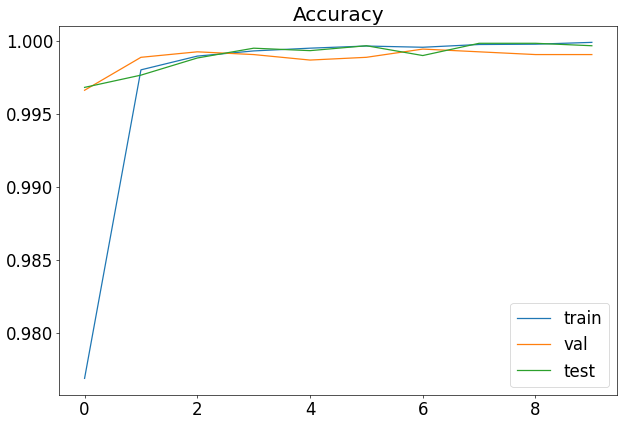

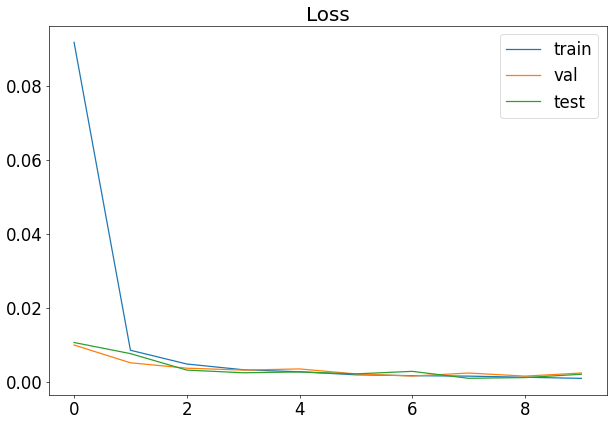

In [ ]:
train(model_resnet18, loaders, optimizer, criterion, epochs=10, dev=device)

In [ ]:
# Set random seed for reproducibility
manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [ ]:
image_size = 64
n_classes = 6
embedding_dim = 100
z_dim = 100  #latent dim
outf = "output"

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_conditioned_generator = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 16))

        self.latent = nn.Sequential(nn.Linear(z_dim, 4*4*512),
                                   nn.LeakyReLU(0.2, inplace=True))

        self.model = nn.Sequential(nn.ConvTranspose2d(513, 64*8, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*8, momentum=0.1,  eps=0.8),
                      nn.ReLU(True),
                      nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*2, 3, 4, 2, 1, bias=False), 

                      nn.Tanh())

    def forward(self, inputs):
        noise_vector, label = inputs
        label_output = self.label_conditioned_generator(label)
        label_output = label_output.view(-1, 1, 4, 4)
        latent_output = self.latent(noise_vector)
        latent_output = latent_output.view(-1, 512, 4, 4)
        concat = torch.cat((latent_output, label_output), dim=1)
        image = self.model(concat)
        return image

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_condition_disc = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 3*64*64))

        self.model = nn.Sequential(nn.Conv2d(6, 64, 4, 2, 1, bias=False),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64, 64*2, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64*2, 64*4, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True), 
                      nn.Flatten(),
                      nn.Dropout(0.4),
                      nn.Linear(64*8*8*4, 1),
                      nn.Sigmoid())
        

    def forward(self, inputs):
        img, label = inputs
        label_output = self.label_condition_disc(label)
        label_output = label_output.view(-1, 3, 64, 64)
        concat = torch.cat((img, label_output), dim=1)
        output = self.model(concat)
        return output

In [ ]:
# custom weights initialization called on generator and discriminator
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

In [ ]:
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Create discriminator and generator
generator = Generator().to(dev)
generator.apply(weights_init)
discriminator = Discriminator().to(dev)
discriminator.apply(weights_init)

Discriminator(
  (label_condition_disc): Sequential(
    (0): Embedding(6, 100)
    (1): Linear(in_features=100, out_features=12288, bias=True)
  )
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16384, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [ ]:
# Loss function
criterion = nn.BCELoss()

# Define the optimizers for the generator and discriminator models
G_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
def generator_loss(label, fake_output):
    gen_loss = criterion(label, fake_output)
    #print(gen_loss)
    return gen_loss

def discriminator_loss(label, output):
    disc_loss = criterion(label, output)
    #print(total_loss)
    return disc_loss

In [ ]:
D_loss_plot, G_loss_plot, all_fid = [], [], []

if os.path.exists("Training_images"):
  shutil.rmtree('Training_images')

transform_fid = T.Compose([
    T.Resize((image_size,image_size))])

image_dir = "Medico/"
training_fid = torchvision.datasets.ImageFolder(image_dir, transform=transform_fid) 

os.makedirs('Training_images')
for idx in tqdm(range(len(training_fid))):
  img, label = training_fid.__getitem__(idx)
  img.save(f"Training_images/{idx}.png")

100%|██████████| 58954/58954 [01:04<00:00, 918.79it/s]


In [ ]:
if os.path.exists("created_image"):
  shutil.rmtree('created_image')

if os.path.exists(outf):
  shutil.rmtree(outf)

try:
    os.makedirs(outf)
except OSError:
  pass   

In [ ]:
def normalize_images_IS(images): #IS wants input between [0,1]
    # Normalize a batch of images to be between 0 and 1
    max_value = torch.max(images)
    min_value = torch.min(images)
    normalized_images = (images - min_value) / (max_value - min_value)
    return normalized_images

In [ ]:
num_epochs = 160
for epoch in range(1, num_epochs+1): 
 
    D_loss_list, G_loss_list = [], []
    
    for index, (real_images, labels) in enumerate(train_loader):
        D_optimizer.zero_grad()
        # Real Data
        real_images = real_images.to(dev)
        # Real labels
        labels = labels.to(dev)
        labels = labels.unsqueeze(1).long()
 
        #Real and fake labels (real = 1, fake = 0)
        real_target = torch.ones(real_images.size(0), 1).to(dev)
        fake_target = torch.zeros(real_images.size(0), 1).to(dev)
       
        D_real_loss = discriminator_loss(discriminator((real_images, labels)), real_target)
     
        # Create the noise (starting of the fake images)
        noise_vector = torch.randn(real_images.size(0), z_dim, device=dev)  
        noise_vector = noise_vector.to(dev)
         
        generated_image = generator((noise_vector, labels))
        output = discriminator((generated_image.detach(), labels))
        D_fake_loss = discriminator_loss(output,  fake_target)
 
        # train with fake       
        D_total_loss = (D_real_loss + D_fake_loss) / 2
        D_loss_list.append(D_total_loss)
       
        D_total_loss.backward()
        D_optimizer.step()
 
        # Train generator with real labels
        G_optimizer.zero_grad()
        G_loss = generator_loss(discriminator((generated_image, labels)), real_target)
        G_loss_list.append(G_loss)
 
        G_loss.backward()
        G_optimizer.step()

    if epoch % 20 == 0 or epoch == 1:
      vutils.save_image(real_images[0], '%s/real_samples.png' % outf, normalize=True) 
      #  fake = generator(noise_vector)
      vutils.save_image(generated_image.detach(), '%s/fake_samples_epoch_%03d.png' % (outf, epoch), normalize=True)
    
    D_loss_plot.append(torch.mean(torch.FloatTensor(D_loss_list)))
    G_loss_plot.append(torch.mean(torch.FloatTensor(G_loss_list)))
    
    #FID and IS calculated every 20 epochs
    if epoch % 20 == 0 or epoch == 1:
      try:
        os.makedirs("created_image")
      except OSError:
        pass  
      for _ in tqdm(range(20)):  
        with torch.no_grad():
          noise_vector = torch.randn(64, z_dim, device=dev)   
          fake_imgs = generator((noise_vector, labels))  
        for idx in range(fake_imgs.shape[0]):
          fake_img= fake_imgs[idx]
          vutils.save_image(fake_img,f"created_image/{str(uuid.uuid4())}.png",normalize=True)
      fid = calculate_fid_given_paths(['Training_images','created_image'],dims=2048, device = 'cuda',batch_size=64)
      fake_imgs = normalize_images_IS(fake_imgs.cpu())  #to be sure that values are normalized between [0,1]
      inception = InceptionScore(normalize = True)  #to make the inception score accept values between [0,1]
      inception.update(fake_imgs)
      all_fid.append(fid)
      print('Epoch: [%d/%d]: D_loss: %.3f | G_loss: %.3f | IS = mean:%.2f, std:%.2f | FID=%.2f' % (
           (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
           torch.mean(torch.FloatTensor(G_loss_list)), inception.compute()[0], inception.compute()[1], fid))
      # do checkpointing
      torch.save(generator.state_dict(), '%s/netG_epoch_%d.pth' % (outf, epoch))
      torch.save(discriminator.state_dict(), '%s/netD_epoch_%d.pth' % (outf, epoch))
      shutil.rmtree('created_image')
    else:
      print('Epoch: [%d/%d]: D_loss: %.3f | G_loss: %.3f' % (
           (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
           torch.mean(torch.FloatTensor(G_loss_list))))

100%|██████████| 20/20 [00:01<00:00, 10.06it/s]
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 199MB/s]
100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 172MB/s]


Epoch: [1/160]: D_loss: 0.444 | G_loss: 1.742 | IS = mean:2.19, std:0.48 | FID=306.78
Epoch: [2/160]: D_loss: 0.507 | G_loss: 1.506
Epoch: [3/160]: D_loss: 0.510 | G_loss: 1.478
Epoch: [4/160]: D_loss: 0.488 | G_loss: 1.564
Epoch: [5/160]: D_loss: 0.457 | G_loss: 1.691
Epoch: [6/160]: D_loss: 0.435 | G_loss: 1.773
Epoch: [7/160]: D_loss: 0.437 | G_loss: 1.775
Epoch: [8/160]: D_loss: 0.440 | G_loss: 1.740
Epoch: [9/160]: D_loss: 0.440 | G_loss: 1.751
Epoch: [10/160]: D_loss: 0.452 | G_loss: 1.728
Epoch: [11/160]: D_loss: 0.455 | G_loss: 1.708
Epoch: [12/160]: D_loss: 0.455 | G_loss: 1.732
Epoch: [13/160]: D_loss: 0.460 | G_loss: 1.723
Epoch: [14/160]: D_loss: 0.460 | G_loss: 1.720
Epoch: [15/160]: D_loss: 0.457 | G_loss: 1.741
Epoch: [16/160]: D_loss: 0.454 | G_loss: 1.760
Epoch: [17/160]: D_loss: 0.457 | G_loss: 1.761
Epoch: [18/160]: D_loss: 0.454 | G_loss: 1.775
Epoch: [19/160]: D_loss: 0.449 | G_loss: 1.796


100%|██████████| 20/20 [00:04<00:00,  4.09it/s]


Epoch: [20/160]: D_loss: 0.445 | G_loss: 1.813 | IS = mean:2.67, std:0.66 | FID=159.25
Epoch: [21/160]: D_loss: 0.448 | G_loss: 1.829
Epoch: [22/160]: D_loss: 0.445 | G_loss: 1.826
Epoch: [23/160]: D_loss: 0.441 | G_loss: 1.851
Epoch: [24/160]: D_loss: 0.435 | G_loss: 1.878
Epoch: [25/160]: D_loss: 0.446 | G_loss: 1.855
Epoch: [26/160]: D_loss: 0.444 | G_loss: 1.871
Epoch: [27/160]: D_loss: 0.461 | G_loss: 1.866
Epoch: [28/160]: D_loss: 0.442 | G_loss: 1.857
Epoch: [29/160]: D_loss: 0.442 | G_loss: 1.862
Epoch: [30/160]: D_loss: 0.438 | G_loss: 1.887
Epoch: [31/160]: D_loss: 0.459 | G_loss: 1.867
Epoch: [32/160]: D_loss: 0.447 | G_loss: 1.885
Epoch: [33/160]: D_loss: 0.448 | G_loss: 1.866
Epoch: [34/160]: D_loss: 0.449 | G_loss: 1.855
Epoch: [35/160]: D_loss: 0.451 | G_loss: 1.854
Epoch: [36/160]: D_loss: 0.451 | G_loss: 1.864
Epoch: [37/160]: D_loss: 0.454 | G_loss: 1.851
Epoch: [38/160]: D_loss: 0.449 | G_loss: 1.868
Epoch: [39/160]: D_loss: 0.453 | G_loss: 1.874


100%|██████████| 20/20 [00:04<00:00,  4.08it/s]


Epoch: [40/160]: D_loss: 0.537 | G_loss: 1.829 | IS = mean:2.52, std:0.60 | FID=138.89
Epoch: [41/160]: D_loss: 0.449 | G_loss: 1.839
Epoch: [42/160]: D_loss: 0.454 | G_loss: 1.869
Epoch: [43/160]: D_loss: 0.451 | G_loss: 1.860
Epoch: [44/160]: D_loss: 0.448 | G_loss: 1.860
Epoch: [45/160]: D_loss: 0.454 | G_loss: 1.863
Epoch: [46/160]: D_loss: 0.457 | G_loss: 1.850
Epoch: [47/160]: D_loss: 0.450 | G_loss: 1.877
Epoch: [48/160]: D_loss: 0.465 | G_loss: 1.850
Epoch: [49/160]: D_loss: 0.450 | G_loss: 1.868
Epoch: [50/160]: D_loss: 0.450 | G_loss: 1.879
Epoch: [51/160]: D_loss: 0.453 | G_loss: 1.860
Epoch: [52/160]: D_loss: 0.451 | G_loss: 1.879
Epoch: [53/160]: D_loss: 0.451 | G_loss: 1.877
Epoch: [54/160]: D_loss: 0.453 | G_loss: 1.883
Epoch: [55/160]: D_loss: 0.454 | G_loss: 1.870
Epoch: [56/160]: D_loss: 0.452 | G_loss: 1.893
Epoch: [57/160]: D_loss: 0.453 | G_loss: 1.868
Epoch: [58/160]: D_loss: 0.452 | G_loss: 1.881
Epoch: [59/160]: D_loss: 0.457 | G_loss: 1.873


100%|██████████| 20/20 [00:05<00:00,  3.91it/s]


Epoch: [60/160]: D_loss: 0.449 | G_loss: 1.884 | IS = mean:2.40, std:0.52 | FID=129.19
Epoch: [61/160]: D_loss: 0.565 | G_loss: 1.897
Epoch: [62/160]: D_loss: 0.451 | G_loss: 1.842
Epoch: [63/160]: D_loss: 0.452 | G_loss: 1.868
Epoch: [64/160]: D_loss: 0.435 | G_loss: 1.923
Epoch: [65/160]: D_loss: 0.433 | G_loss: 1.952
Epoch: [66/160]: D_loss: 0.436 | G_loss: 1.954
Epoch: [67/160]: D_loss: 0.437 | G_loss: 1.953
Epoch: [68/160]: D_loss: 0.439 | G_loss: 1.960
Epoch: [69/160]: D_loss: 0.440 | G_loss: 1.945
Epoch: [70/160]: D_loss: 0.439 | G_loss: 1.962
Epoch: [71/160]: D_loss: 0.443 | G_loss: 1.935
Epoch: [72/160]: D_loss: 0.461 | G_loss: 1.909
Epoch: [73/160]: D_loss: 0.437 | G_loss: 1.947
Epoch: [74/160]: D_loss: 0.447 | G_loss: 1.943
Epoch: [75/160]: D_loss: 0.451 | G_loss: 1.927
Epoch: [76/160]: D_loss: 0.446 | G_loss: 1.929
Epoch: [77/160]: D_loss: 0.445 | G_loss: 1.935
Epoch: [78/160]: D_loss: 0.445 | G_loss: 1.931
Epoch: [79/160]: D_loss: 0.451 | G_loss: 1.930


100%|██████████| 20/20 [00:04<00:00,  4.09it/s]


Epoch: [80/160]: D_loss: 0.454 | G_loss: 1.918 | IS = mean:2.70, std:0.69 | FID=134.61
Epoch: [81/160]: D_loss: 0.443 | G_loss: 1.937
Epoch: [82/160]: D_loss: 0.446 | G_loss: 1.939
Epoch: [83/160]: D_loss: 0.452 | G_loss: 1.941
Epoch: [84/160]: D_loss: 0.445 | G_loss: 1.939
Epoch: [85/160]: D_loss: 0.448 | G_loss: 1.926
Epoch: [86/160]: D_loss: 0.448 | G_loss: 1.942
Epoch: [87/160]: D_loss: 0.446 | G_loss: 1.934
Epoch: [88/160]: D_loss: 0.441 | G_loss: 1.939
Epoch: [89/160]: D_loss: 0.446 | G_loss: 1.951
Epoch: [90/160]: D_loss: 0.441 | G_loss: 1.960
Epoch: [91/160]: D_loss: 0.443 | G_loss: 1.967
Epoch: [92/160]: D_loss: 0.436 | G_loss: 1.962
Epoch: [93/160]: D_loss: 0.437 | G_loss: 1.973
Epoch: [94/160]: D_loss: 0.436 | G_loss: 1.993
Epoch: [95/160]: D_loss: 0.434 | G_loss: 1.991
Epoch: [96/160]: D_loss: 0.437 | G_loss: 1.984
Epoch: [97/160]: D_loss: 0.432 | G_loss: 2.019
Epoch: [98/160]: D_loss: 0.430 | G_loss: 2.010
Epoch: [99/160]: D_loss: 0.434 | G_loss: 2.012


100%|██████████| 20/20 [00:05<00:00,  3.97it/s]


Epoch: [100/160]: D_loss: 0.434 | G_loss: 1.998 | IS = mean:2.83, std:0.83 | FID=116.73
Epoch: [101/160]: D_loss: 0.435 | G_loss: 2.008
Epoch: [102/160]: D_loss: 0.436 | G_loss: 2.017
Epoch: [103/160]: D_loss: 0.437 | G_loss: 2.000
Epoch: [104/160]: D_loss: 0.427 | G_loss: 2.010
Epoch: [105/160]: D_loss: 0.434 | G_loss: 2.028
Epoch: [106/160]: D_loss: 0.427 | G_loss: 2.032
Epoch: [107/160]: D_loss: 0.424 | G_loss: 2.057
Epoch: [108/160]: D_loss: 0.428 | G_loss: 2.046
Epoch: [109/160]: D_loss: 0.426 | G_loss: 2.061
Epoch: [110/160]: D_loss: 0.427 | G_loss: 2.060
Epoch: [111/160]: D_loss: 0.428 | G_loss: 2.053
Epoch: [112/160]: D_loss: 0.424 | G_loss: 2.064
Epoch: [113/160]: D_loss: 0.426 | G_loss: 2.057
Epoch: [114/160]: D_loss: 0.418 | G_loss: 2.099
Epoch: [115/160]: D_loss: 0.415 | G_loss: 2.104
Epoch: [116/160]: D_loss: 0.429 | G_loss: 2.082
Epoch: [117/160]: D_loss: 0.411 | G_loss: 2.116
Epoch: [118/160]: D_loss: 0.418 | G_loss: 2.115
Epoch: [119/160]: D_loss: 0.422 | G_loss: 2.105


100%|██████████| 20/20 [00:04<00:00,  4.09it/s]


Epoch: [120/160]: D_loss: 0.416 | G_loss: 2.125 | IS = mean:2.58, std:0.65 | FID=103.95
Epoch: [121/160]: D_loss: 0.419 | G_loss: 2.113
Epoch: [122/160]: D_loss: 0.410 | G_loss: 2.131
Epoch: [123/160]: D_loss: 0.412 | G_loss: 2.130
Epoch: [124/160]: D_loss: 0.414 | G_loss: 2.141
Epoch: [125/160]: D_loss: 0.410 | G_loss: 2.162
Epoch: [126/160]: D_loss: 0.409 | G_loss: 2.167
Epoch: [127/160]: D_loss: 0.407 | G_loss: 2.140
Epoch: [128/160]: D_loss: 0.409 | G_loss: 2.163
Epoch: [129/160]: D_loss: 0.625 | G_loss: 2.177
Epoch: [130/160]: D_loss: 0.401 | G_loss: 2.128
Epoch: [131/160]: D_loss: 0.409 | G_loss: 2.162
Epoch: [132/160]: D_loss: 0.402 | G_loss: 2.199
Epoch: [133/160]: D_loss: 0.407 | G_loss: 2.187
Epoch: [134/160]: D_loss: 0.405 | G_loss: 2.180
Epoch: [135/160]: D_loss: 0.396 | G_loss: 2.223
Epoch: [136/160]: D_loss: 0.398 | G_loss: 2.235
Epoch: [137/160]: D_loss: 0.397 | G_loss: 2.233
Epoch: [138/160]: D_loss: 0.400 | G_loss: 2.233
Epoch: [139/160]: D_loss: 0.401 | G_loss: 2.216


100%|██████████| 20/20 [00:04<00:00,  4.04it/s]


Epoch: [140/160]: D_loss: 0.442 | G_loss: 2.226 | IS = mean:2.53, std:0.58 | FID=93.77
Epoch: [141/160]: D_loss: 0.388 | G_loss: 2.238
Epoch: [142/160]: D_loss: 0.394 | G_loss: 2.255
Epoch: [143/160]: D_loss: 0.392 | G_loss: 2.294
Epoch: [144/160]: D_loss: 0.390 | G_loss: 2.275
Epoch: [145/160]: D_loss: 0.391 | G_loss: 2.282
Epoch: [146/160]: D_loss: 0.392 | G_loss: 2.296
Epoch: [147/160]: D_loss: 0.381 | G_loss: 2.323
Epoch: [148/160]: D_loss: 0.381 | G_loss: 2.332
Epoch: [149/160]: D_loss: 0.383 | G_loss: 2.322
Epoch: [150/160]: D_loss: 0.388 | G_loss: 2.345
Epoch: [151/160]: D_loss: 0.379 | G_loss: 2.354
Epoch: [152/160]: D_loss: 0.383 | G_loss: 2.344
Epoch: [153/160]: D_loss: 0.379 | G_loss: 2.348
Epoch: [154/160]: D_loss: 0.381 | G_loss: 2.373
Epoch: [155/160]: D_loss: 0.376 | G_loss: 2.401
Epoch: [156/160]: D_loss: 0.371 | G_loss: 2.410
Epoch: [157/160]: D_loss: 0.377 | G_loss: 2.393
Epoch: [158/160]: D_loss: 0.376 | G_loss: 2.398
Epoch: [159/160]: D_loss: 0.377 | G_loss: 2.415


100%|██████████| 20/20 [00:04<00:00,  4.06it/s]


Epoch: [160/160]: D_loss: 0.377 | G_loss: 2.417 | IS = mean:2.64, std:0.76 | FID=99.87


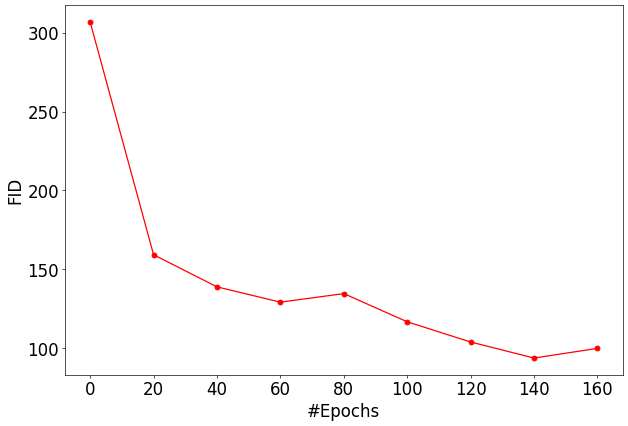

In [ ]:
x = [i * 20 for i in range(0,len(all_fid))]
plt.ylabel("FID")
plt.xlabel("#Epochs")
plt.plot(x,all_fid, 'o-r') 
plt.show()

In [ ]:
torch.save(generator, 'generatorENTIRE.pth')
torch.save(discriminator, 'discriminatorENTIRE.pth')

In [ ]:
generator = torch.load('generatorENTIRE.pth')
discriminator = torch.load('discriminatorENTIRE.pth')
generator.eval()
print(summary(generator))
print(summary(discriminator))

Layer (type:depth-idx)                   Param #
Generator                                --
├─Sequential: 1-1                        --
│    └─Embedding: 2-1                    600
│    └─Linear: 2-2                       1,616
├─Sequential: 1-2                        --
│    └─Linear: 2-3                       827,392
│    └─LeakyReLU: 2-4                    --
├─Sequential: 1-3                        --
│    └─ConvTranspose2d: 2-5              4,202,496
│    └─BatchNorm2d: 2-6                  1,024
│    └─ReLU: 2-7                         --
│    └─ConvTranspose2d: 2-8              2,097,152
│    └─BatchNorm2d: 2-9                  512
│    └─ReLU: 2-10                        --
│    └─ConvTranspose2d: 2-11             524,288
│    └─BatchNorm2d: 2-12                 256
│    └─ReLU: 2-13                        --
│    └─ConvTranspose2d: 2-14             6,144
│    └─Tanh: 2-15                        --
Total params: 7,661,480
Trainable params: 7,661,480
Non-trainable params: 0
Lay

In [ ]:
if os.path.exists("Fake_images_for_classification"):
  shutil.rmtree('Fake_images_for_classification')

os.makedirs('Fake_images_for_classification/train/AbdomenCT')
os.makedirs('Fake_images_for_classification/train/BreastMRI')
os.makedirs('Fake_images_for_classification/train/CXR')
os.makedirs('Fake_images_for_classification/train/ChestCT')
os.makedirs('Fake_images_for_classification/train/Hand')
os.makedirs('Fake_images_for_classification/train/HeadCT')

In [ ]:
label0 = torch.tensor([0]).to(dev)
label0 = label0.unsqueeze(1).long()
label1 = torch.tensor([1]).to(dev)
label1 = label1.unsqueeze(1).long()
label2 = torch.tensor([2]).to(dev)
label2 = label2.unsqueeze(1).long()
label3 = torch.tensor([3]).to(dev)
label3 = label3.unsqueeze(1).long()
label4 = torch.tensor([4]).to(dev)
label4 = label4.unsqueeze(1).long()
label5 = torch.tensor([5]).to(dev)
label5 = label5.unsqueeze(1).long()
generator.eval()
for i in range(7000):
  noise_vector = torch.randn(1, z_dim, device=dev)  
  generated_single_image = generator((noise_vector, label0))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/AbdomenCT/AbdomenCT_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label1))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/BreastMRI/BreastMRI_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label2))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/CXR/CXR_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label3))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/ChestCT/ChestCT_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label4))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/Hand/Hand_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label5))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/HeadCT/HeadCT_{i}.png", nrow=6, normalize=True)



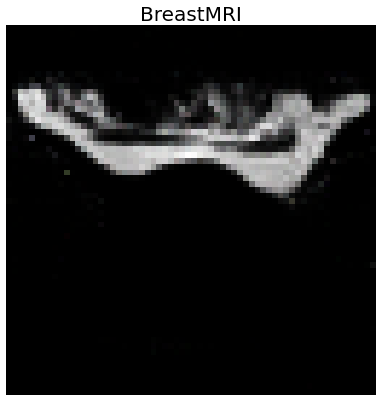

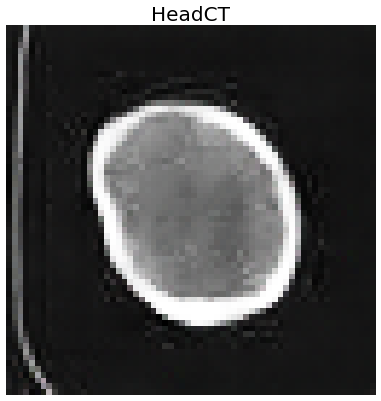

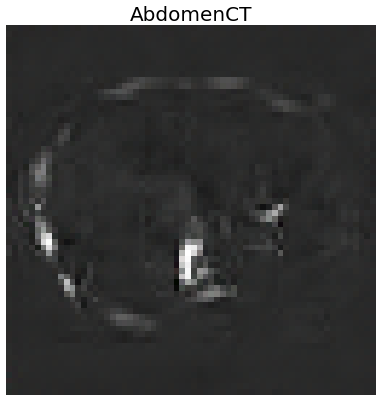

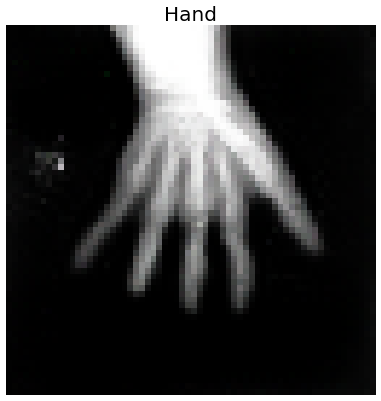

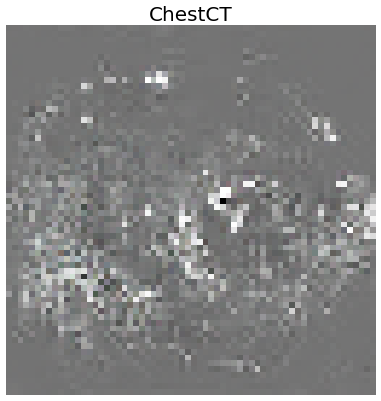

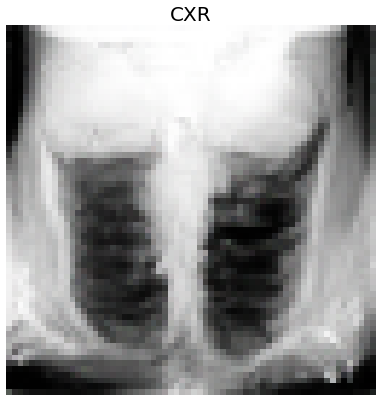

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory = 'Fake_images_for_classification/train/'
subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]

for subdir in subdirectories:
    subdir_path = os.path.join(directory, subdir)
    images_files = [file for file in os.listdir(subdir_path) if file.endswith('.png')]
    
    if images_files:
        random_images = random.choice(images_files)
        images_path = os.path.join(subdir_path, random_images)
    
        imgs = mpimg.imread(images_path)
        plt.imshow(imgs)
        plt.title(subdir)  # Display the subdirectory name as the plot title
        plt.axis('off')
        plt.show()




In [ ]:
image_dir = "Fake_images_for_classification"
dataset_GAN = torchvision.datasets.ImageFolder(image_dir, transform=transform)
concat_training_set = ConcatDataset([train_set, dataset_GAN])
print(f'Training set (of original training images + gan images): {len(concat_training_set)}')
concat_dataloader = DataLoader(concat_training_set, batch_size=64, shuffle=True, drop_last = True, num_workers = 2)

Training set (of original training images + gan images): 89754


In [ ]:
gan_model_resnet18 = models.resnet18(weights=None)   #load resnet18 model
num_features = gan_model_resnet18.fc.in_features     #extract fc layers features
gan_model_resnet18.fc = nn.Linear(num_features, 6) #(num_of_class == 6)
gan_model_resnet18 = gan_model_resnet18.to(device) 
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = optim.SGD(gan_model_resnet18.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Initialize history
gan_history_loss = {"train": [], "val": [], "test": []} 
gan_history_accuracy = {"train": [], "val": [], "test": []}  
def gan_train(net, loaders, optimizer, criterion, epochs=10, dev=dev):
    try:
        net = net.to(dev)
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0,"test": 0}  
            sum_accuracy = {"train": 0, "val": 0,"test": 0}  
            # Process each split
            for split in ["train", "val", "test"]:  
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in loaders[split]:
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    outputs = net(input)
                    loss = criterion(outputs, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    preds = torch.argmax(outputs, 1)
                    batch_accuracy = (preds == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            # Update history
            for split in ["train", "val", "test"]:   
                gan_history_loss[split].append(epoch_loss[split])
                gan_history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrACC={epoch_accuracy['train']:.4f},",
                  f"TrLoss={epoch_loss['train']:.4f} ||",
                  f"ValACC={epoch_accuracy['val']:.4f},",
                  f"ValLoss={epoch_loss['val']:.4f} ||",
                  f"TestACC={epoch_accuracy['test']:.4f},",
                  f"TestLoss={epoch_loss['test']:.4f} ||")      
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:  
            plt.plot(gan_history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:  
            plt.plot(gan_history_loss[split], label=split)
        plt.legend()
        plt.show()

# Define dictionary of loaders
loaders = {"train": concat_dataloader,   
           "val": val_loader,   
           "test": test_loader}         

Epoch 1: TrACC=0.8131, TrLoss=0.3931 || ValACC=0.9318, ValLoss=0.1814 || TestACC=0.9249, TestLoss=0.1913 ||
Epoch 2: TrACC=0.9368, TrLoss=0.1582 || ValACC=0.9768, ValLoss=0.0701 || TestACC=0.9736, TestLoss=0.0750 ||
Epoch 3: TrACC=0.9671, TrLoss=0.0884 || ValACC=0.9840, ValLoss=0.0463 || TestACC=0.9835, TestLoss=0.0493 ||
Epoch 4: TrACC=0.9787, TrLoss=0.0589 || ValACC=0.9749, ValLoss=0.0674 || TestACC=0.9741, TestLoss=0.0663 ||
Epoch 5: TrACC=0.9846, TrLoss=0.0425 || ValACC=0.9881, ValLoss=0.0370 || TestACC=0.9856, TestLoss=0.0423 ||
Epoch 6: TrACC=0.9892, TrLoss=0.0310 || ValACC=0.9947, ValLoss=0.0161 || TestACC=0.9960, TestLoss=0.0149 ||
Epoch 7: TrACC=0.9904, TrLoss=0.0271 || ValACC=0.9957, ValLoss=0.0128 || TestACC=0.9978, TestLoss=0.0099 ||
Epoch 8: TrACC=0.9918, TrLoss=0.0240 || ValACC=0.9944, ValLoss=0.0171 || TestACC=0.9951, TestLoss=0.0151 ||
Epoch 9: TrACC=0.9935, TrLoss=0.0186 || ValACC=0.9921, ValLoss=0.0236 || TestACC=0.9916, TestLoss=0.0244 ||
Epoch 10: TrACC=0.9955, TrLo

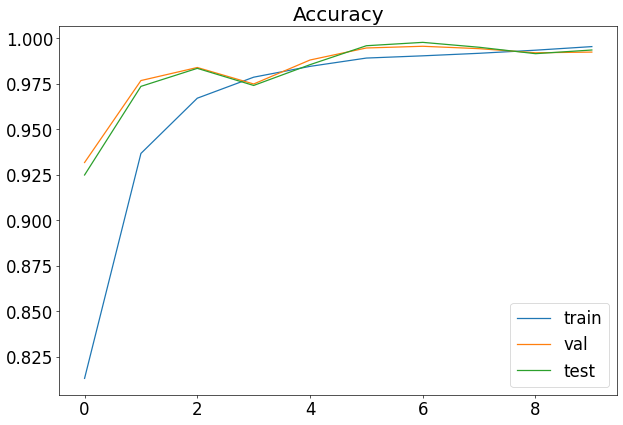

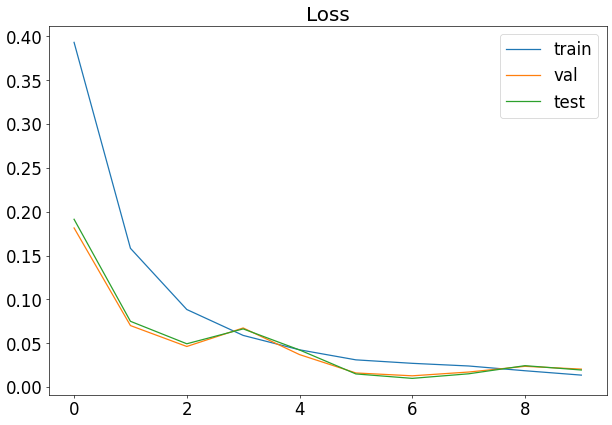

In [ ]:
gan_train(gan_model_resnet18, loaders, optimizer, criterion, epochs=10, dev=dev)

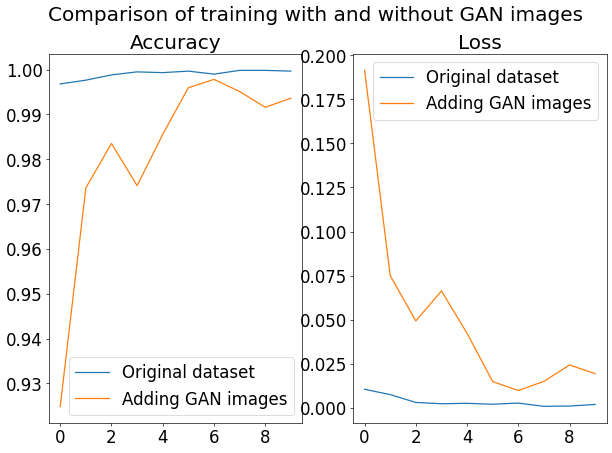

In [ ]:
#plot 1:
plt.subplot(1, 2, 1)
plt.title("Accuracy")
plt.plot(history_accuracy['test'], label='Original dataset')
plt.plot(gan_history_accuracy['test'], label='Adding GAN images')
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(history_loss['test'], label='Original dataset')
plt.plot(gan_history_loss['test'], label='Adding GAN images')
plt.legend()

plt.suptitle("Comparison of training with and without GAN images ")
plt.show()